In [1]:
# K-Nearest Neighbors
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter


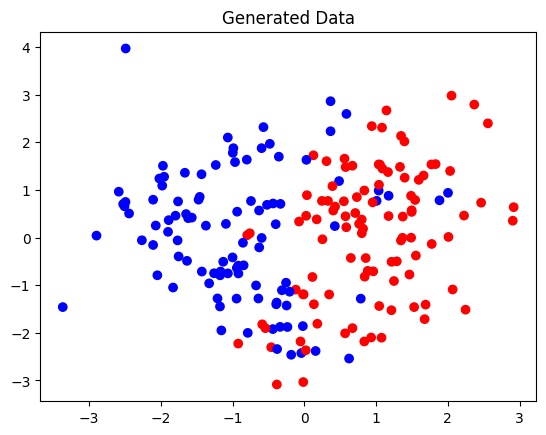

In [29]:
# Dataset
X, y = make_classification(n_samples=200, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2, random_state=42)


# Converting to dataframe
df = pd.DataFrame(X, columns=["x1", "x2"])
df['y'] = y

#Plot

plt.scatter(df["x1"], df["x2"], c=df["y"], cmap="bwr")
plt.title("Generated Data")
plt.show()

In [45]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2, axis=1)) # axis = 1, sums up column-wise meaning if a row has value (2,3 ) then sum = 5, or mantain the column structure.
    
    def _vote(self, neighbor_labels):
        count = Counter(neighbor_labels)
        return count.most_common(1)[0][0] # this gives a list of top (x) common elements in a [[("0", 4)][("1", 3)][("2", 5)]] format

    def predict(self, X):
        X = np.array(X) # list of points that are begin predicted
        y_pred = []

        for x_test in X:
            distances = self._euclidean_distance(self.X_train, x_test) # Finds distance with every point in traning set
            k_indices = np.argsort(distances)[:self.k] # First sorts the array then finds indices, then we slice first 3 indices
            k_labels = self.y_train[k_indices]
            predicted_label = self._vote(k_labels)
            y_pred.append(predicted_label)

        return np.array(y_pred)




In [53]:
# Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df[["x1", "x2"]], df["y"], test_size=0.3, random_state=42)

knn = KNNClassifier(k=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.85


In [56]:
# Comparision with Sklearn
import sklearn.neighbors

knn_sklearn  = sklearn.neighbors.KNeighborsClassifier(n_neighbors=7)

knn_sklearn.fit(X_train, y_train)
y_pred = knn_sklearn.predict(X_test)

print("Accuracy of sklearn KNN: ", accuracy_score(y_test, y_pred))

Accuracy of sklearn KNN:  0.85
